# Projet 5 : Contrat de maintenance

## Introduction

Nous allons maintenant travailler sur le contrat de maintenance afin de déterminer à quelle fréquence il serait pertinent de mettre en place un suivi et une rectification des clusters clients.

#### Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importation du fichier à étudier

In [2]:
# Lire le fichier CSV compressé avec XZ
data = pd.read_csv("data_cleaned.csv")
data = data.drop('customer_id', axis=1)

# Afficher les premières lignes du DataFrame
data.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP
0,-0.496187,-0.715888,-0.128448,-0.699813,-0.580230,-0.024834,-0.873671,-0.793678,1.044746,-0.426765,...,False,False,False,False,False,False,False,False,False,True
1,-0.496187,-0.715888,2.611858,-0.699813,-0.640860,-0.024834,-0.873671,-0.793678,1.044746,-0.426765,...,False,False,False,False,False,False,False,False,False,True
2,-0.496187,-0.715888,1.241705,-0.699813,-0.578462,-0.024834,-0.873671,-0.793678,1.044746,-0.426765,...,False,False,False,False,False,False,False,False,False,True
3,-0.496187,-0.775246,-0.128448,0.019333,-0.506322,-0.024834,-0.873671,-0.793678,1.044746,-0.426765,...,False,False,False,False,False,False,False,False,False,True
4,-0.496187,-0.775246,-0.128448,-0.699813,-0.506322,0.696887,-0.873671,-0.793678,1.044746,-0.426765,...,False,False,False,False,False,False,False,False,False,True


Tout d'abord nous pouvons commencer par faire un ARI, en effet ce n'est pas le plus pertinent pour notre cas mais nous pouvons quand même le faire pour avoir une idée. 

In [3]:
### Ce script utilise l'algorithme KMeans pour effectuer le clustering sur un ensemble de données.
### Il divise d'abord les données en ensembles d'apprentissage et de test, puis entraîne deux modèles de clustering sur l'ensemble d'apprentissage.
### Ensuite, il prédit les clusters sur l'ensemble de test à l'aide des deux modèles, et calcule l'Adjusted Rand Index (ARI) entre ces prédictions.
### Enfin, il décide si le modèle doit être réentraîné en fonction de l'ARI obtenu par rapport à un seuil prédéfini.


from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split

# on divise les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# on entraîne le modèle de clustering sur l'ensemble d'apprentissage
kmeans1 = KMeans(n_clusters=5, random_state=42,n_init = 10)
kmeans1.fit(X_train)

# on prédit les clusters sur l'ensemble de test
predicted_labels1 = kmeans1.predict(X_test)

# on réentraine le modèle de clustering sur l'ensemble d'apprentissage une deuxième fois
kmeans2 = KMeans(n_clusters=4, random_state=10,n_init = 10)
kmeans2.fit(X_train)

# On prédit les clusters sur l'ensemble de test avec le deuxième modèle
predicted_labels2 = kmeans2.predict(X_test)

# Ici on calcule l'Adjusted Rand Index (ARI) entre les deux prédictions
ari = adjusted_rand_score(predicted_labels1, predicted_labels2)
print("Adjusted Rand Index (ARI) entre les deux prédictions :", ari)

# Et maintenant on met en place un seuil pour savoir si on doit réentraîner le modèle en fonction de l'ARI obtenu
seuil_ari = 0.8  
if ari < seuil_ari:
    print("L'ARI est inférieur au seuil. Réentraînez le modèle.")
else:
    print("L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.")

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Adjusted Rand Index (ARI) entre les deux prédictions : 0.9584782749588311
L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.


In [4]:
### On fait de même pour ce script mais cette fois si on fait une réitaration pour voir les résultats sur plusieurs passages

# on divise les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# on défini le nombre d'itérations de réentrainement
nombre_iterations = 5
seuil_ari = 0.5  

# on entraine le modèle de clustering sur l'ensemble d'apprentissage pour la première fois
kmeans = KMeans(n_clusters=5, random_state=42,n_init = 10)
kmeans.fit(X_train)

for i in range(nombre_iterations):
    # prediction des clusters sur l'ensemble de test
    predicted_labels1 = kmeans.predict(X_test)

    # réentrainement du modèle de clustering sur l'ensemble d'apprentissage avec une nouvelle initialisation
    kmeans = KMeans(n_clusters=7, random_state=i ,n_init = 10)
    kmeans.fit(X_train)

    # prediction des clusters sur l'ensemble de test avec le modèle réentraîné
    predicted_labels2 = kmeans.predict(X_test)

    # calcul l'Adjusted Rand Index (ARI) entre les deux prédictions
    ari = adjusted_rand_score(predicted_labels1, predicted_labels2)
    print("Iteration", i+1, "- Adjusted Rand Index (ARI) :", ari)

    # Et maintenant on met en place un seuil pour savoir si on doit réentraîner le modèle en fonction de l'ARI obtenu
    if ari < seuil_ari:
        print("L'ARI est inférieur au seuil. Réentraînez le modèle.")
        # on4 reentraine le modèle de clustering sur l'ensemble d'apprentissage pour la prochaine itération
        kmeans = KMeans(n_clusters=4, random_state=i+1 ,n_init = 10)
        kmeans.fit(X_train) 
    else:
        print("L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.")

Iteration 1 - Adjusted Rand Index (ARI) : 0.5489564636039193
L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.
Iteration 2 - Adjusted Rand Index (ARI) : 1.0
L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.
Iteration 3 - Adjusted Rand Index (ARI) : 1.0
L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.
Iteration 4 - Adjusted Rand Index (ARI) : 1.0
L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.
Iteration 5 - Adjusted Rand Index (ARI) : 0.9999408951303744
L'ARI est supérieur ou égal au seuil. Pas besoin de réentraîner le modèle pour le moment.


In [5]:
### Ce script me permet de connaitre la première date comprise dans notre ensemble de données ainsi que la dernière

# Convertir les colonnes purchase_month et purchase_year en format datetime
data['purchase_date'] = pd.to_datetime(data['purchase_year'].astype(str) + '-' + data['purchase_month'].astype(str), format='%Y-%m')

# Trouver la première et la dernière date dans vos données
date_debut = data['purchase_date'].min()
date_fin = data['purchase_date'].max()

# Déterminer la période couverte par vos données
periode_debut = date_debut.to_period('M')
periode_fin = date_fin.to_period('M')

# Afficher les résultats
print("Période couverte par nos données :", periode_debut, "à", periode_fin)

Période couverte par nos données : 2016-09 à 2018-09


Grâce à cela nous pouvons maintenant commencer à segmenter nos données, nous allons donc faire cela : 

In [6]:
### Je décide maintenant de séparer les données en période temporelle pour pouvoir par la suite observer l'évolution des prédictions

# Création d'une liste de périodes mensuelles
periodes_temporelles = pd.period_range(start=periode_debut, end=periode_fin, freq='M')

# Convertion des périodes temporelles en objets datetime64
periodes_temporelles_start = periodes_temporelles.to_timestamp()
periodes_temporelles_end = periodes_temporelles.to_timestamp(how='end')

# Boucle à travers les périodes temporelles
for i in range(len(periodes_temporelles)-1):
    # Filtrage des données pour n'inclure que les données de cette période
    periode_data = data[(data['purchase_date'] >= periodes_temporelles_start[i]) & (data['purchase_date'] < periodes_temporelles_end[i+1])]
    
    print(f"Période {i+1} : de {periodes_temporelles[i]} à {periodes_temporelles[i+1]}")
    print(f"Nombre d'entrées de données dans cette période : {len(periode_data)}")

Période 1 : de 2016-09 à 2016-10
Nombre d'entrées de données dans cette période : 380
Période 2 : de 2016-10 à 2016-11
Nombre d'entrées de données dans cette période : 377
Période 3 : de 2016-11 à 2016-12
Nombre d'entrées de données dans cette période : 1
Période 4 : de 2016-12 à 2017-01
Nombre d'entrées de données dans cette période : 999
Période 5 : de 2017-01 à 2017-02
Nombre d'entrées de données dans cette période : 2997
Période 6 : de 2017-02 à 2017-03
Nombre d'entrées de données dans cette période : 5108
Période 7 : de 2017-03 à 2017-04
Nombre d'entrées de données dans cette période : 5869
Période 8 : de 2017-04 à 2017-05
Nombre d'entrées de données dans cette période : 7060
Période 9 : de 2017-05 à 2017-06
Nombre d'entrées de données dans cette période : 8028
Période 10 : de 2017-06 à 2017-07
Nombre d'entrées de données dans cette période : 8501
Période 11 : de 2017-07 à 2017-08
Nombre d'entrées de données dans cette période : 9856
Période 12 : de 2017-08 à 2017-09
Nombre d'entr

Comme on peut se rendre compte nous avons très peu de données sur les premières périodes, c'est pour cela que nous allons fusionner les premières periodes ensemble de sorte à vraiment pouvoir les comparer par la suite.

In [12]:
# On défini les périodes pour les premiers quatre mois
periode_debut = '2016-09'
debut_quatrieme_mois = '2017-01'

# Définition du nombre de clusters optimal que l'on à trouvé
nombre_de_clusters = 5

# Création d'une liste pour stocker les DataFrames par période
dataframes_par_periode = []

# Sélection des données des quatre premiers mois
periode_data_premiers_mois = data[(data['purchase_date'] >= periode_debut) & (data['purchase_date'] < debut_quatrieme_mois)]

# Ajout des données des quatre premiers mois au premier DataFrame
dataframes_par_periode.append(periode_data_premiers_mois)

# Création d'une liste de périodes mensuelles pour les mois restants
periodes_temporelles_restants = pd.period_range(start=debut_quatrieme_mois, end=periode_fin, freq='M')

# Convertion des périodes temporelles en objets datetime64
periodes_temporelles_restants_start = periodes_temporelles_restants.to_timestamp()
periodes_temporelles_restants_end = periodes_temporelles_restants.to_timestamp(how='end')

# Boucle à travers les périodes temporelles restantes
for i in range(len(periodes_temporelles_restants)-1):
    # Filtration des données pour n'inclure que les données de cette période
    periode_data = data[(data['purchase_date'] >= periodes_temporelles_restants_start[i]) & (data['purchase_date'] < periodes_temporelles_restants_end[i+1])]
    
    # Ajout du DataFrame de la période à notre liste
    dataframes_par_periode.append(periode_data)

# Boucle à travers les DataFrames par période
for i, periode_data in enumerate(dataframes_par_periode):
    # Sélection de toutes les colonnes comme caractéristiques
    X = periode_data.drop(columns=['purchase_date'])  
    
    # Initialisation et lancement de l'algorithme KMeans
    kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=42,n_init=10)
    clusters = kmeans.fit_predict(X)
    
    # Calcul des score de silhouette
    score_silhouette = silhouette_score(X, clusters)
    
    # Affichage des scores de silhouette pour les périodes
    print(f"Score de silhouette pour la période {i+1} : {score_silhouette}")

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score de silhouette pour la période 1 : 0.08872476355336327
Score de silhouette pour la période 2 : 0.09731060511656031
Score de silhouette pour la période 3 : 0.12840856478557638
Score de silhouette pour la période 4 : 0.121466753157189
Score de silhouette pour la période 5 : 0.12015612458091939
Score de silhouette pour la période 6 : 0.12716416283320417
Score de silhouette pour la période 7 : 0.11077245444963052
Score de silhouette pour la période 8 : 0.11200460057671432
Score de silhouette pour la période 9 : 0.1090965051024703
Score de silhouette pour la période 10 : 0.10452867114886469
Score de silhouette pour la période 11 : 0.09546824796126199
Score de silhouette pour la période 12 : 0.112052584547863
Score de silhouette pour la période 13 : 0.2854890258750792
Score de silhouette pour la période 14 : 0.11571510699339928
Score de silhouette pour la période 15 : 0.11296594000122091
Score de silhouette pour la période 16 : 0.11138656750597806
Score de silhouette pour la période 17 

Les périodes 3, 4, 6 et 13 ont des scores de silhouette relativement élevés, ce qui pourrait indiquer une meilleure séparation des clusters et une plus grande cohérence dans la composition des clusters à ces moments-là. Au contraire, les périodes 1, 2, 17 et 18 ont des scores plus bas, ce qui indique une plus faible précision dans la séparation des clusters ou une cohésion plus faible entre les points pour ces périodes.

#### Maintenant l'ojectif est de visualiser cette répartition suivant nos différentes périodes

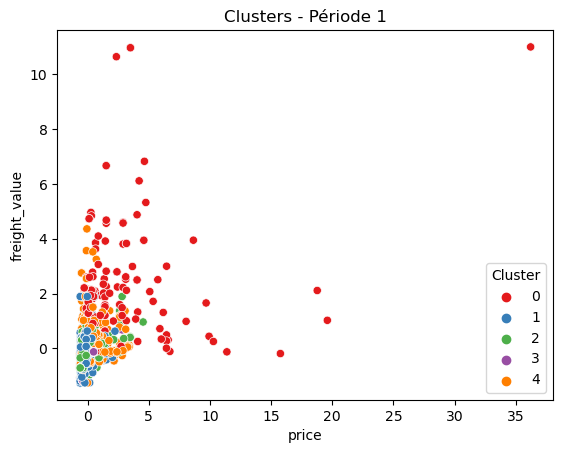

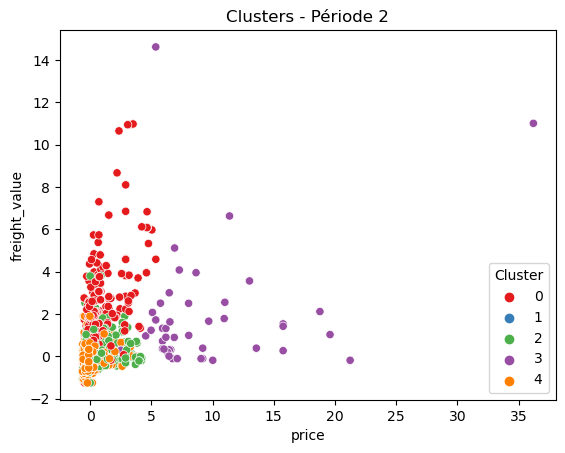

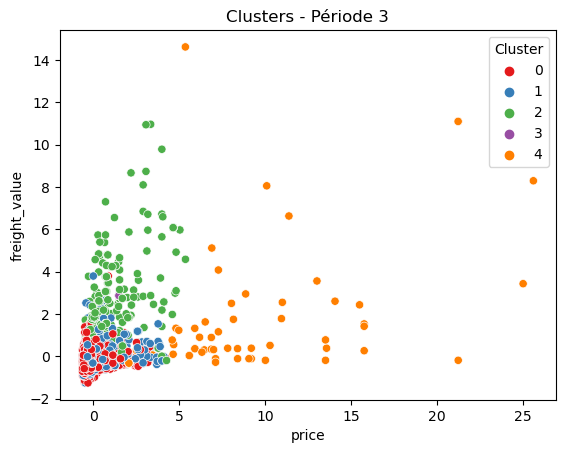

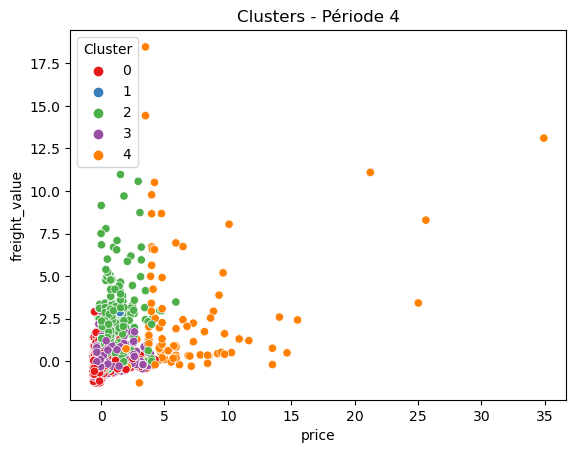

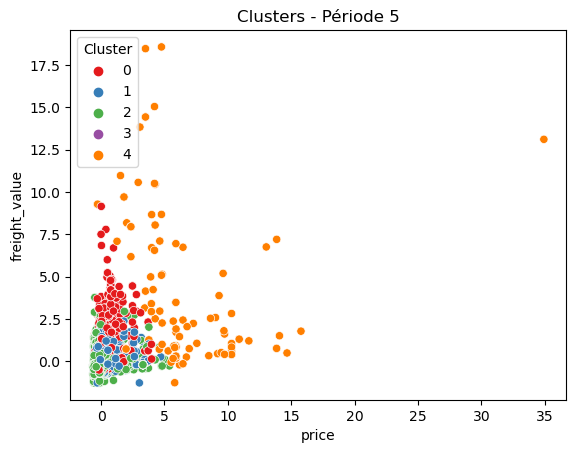

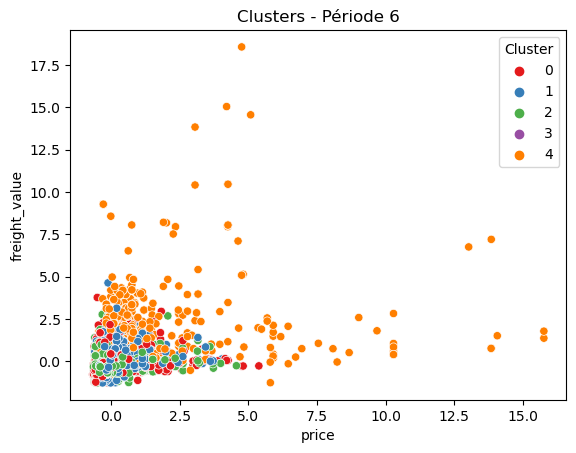

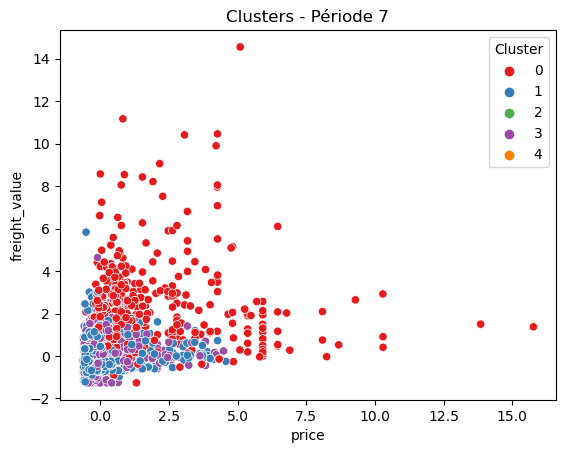

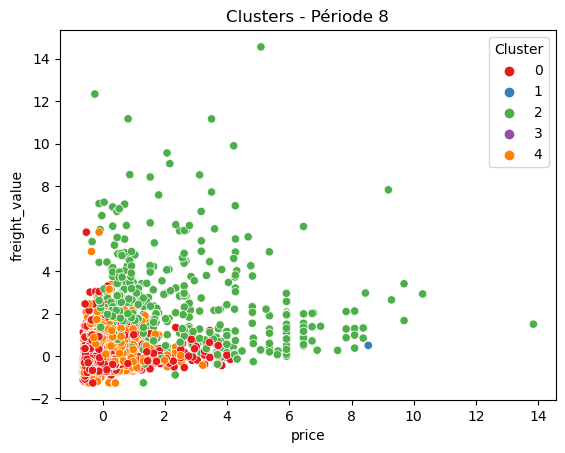

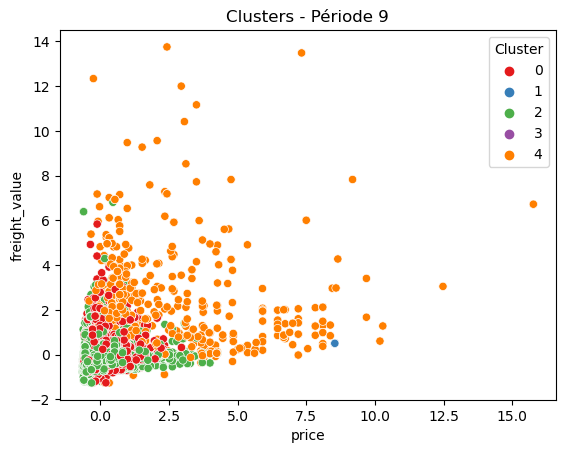

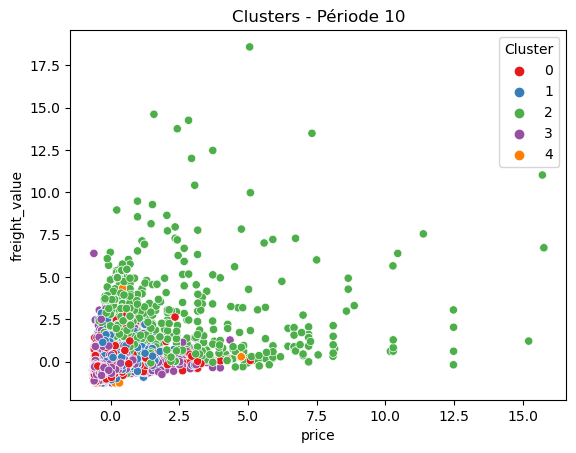

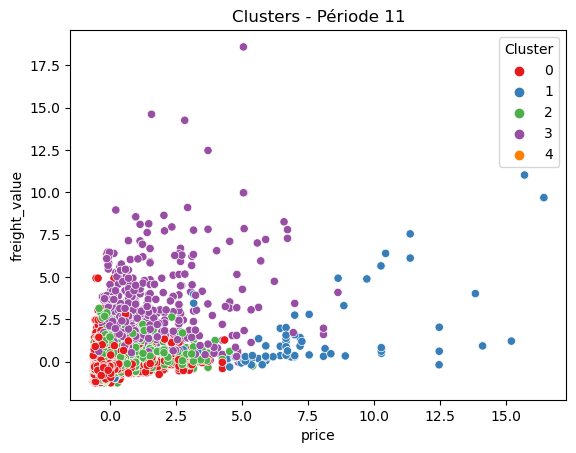

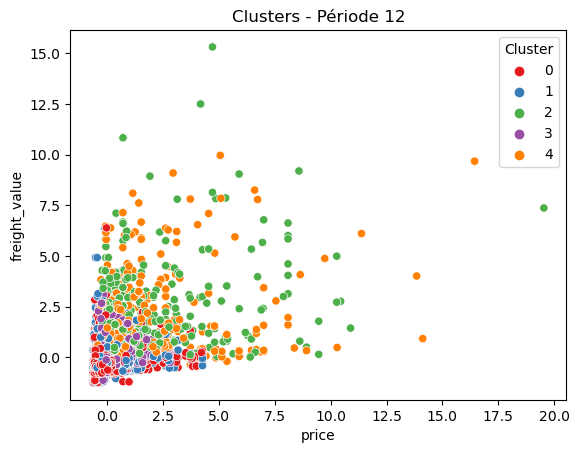

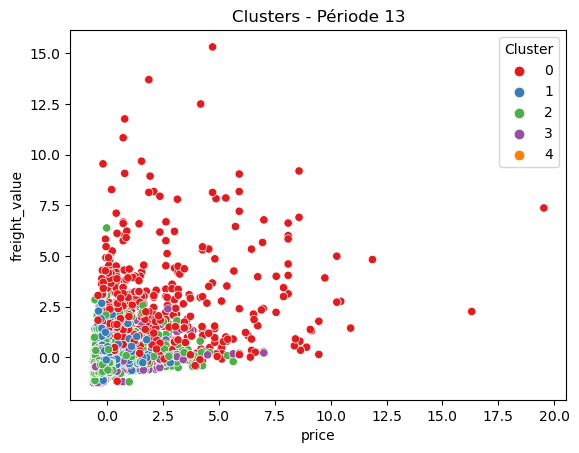

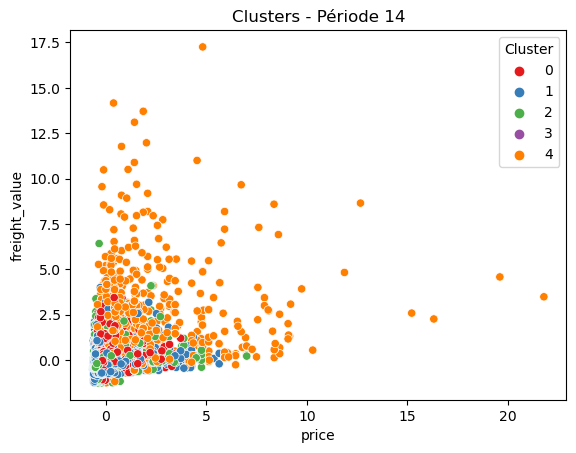

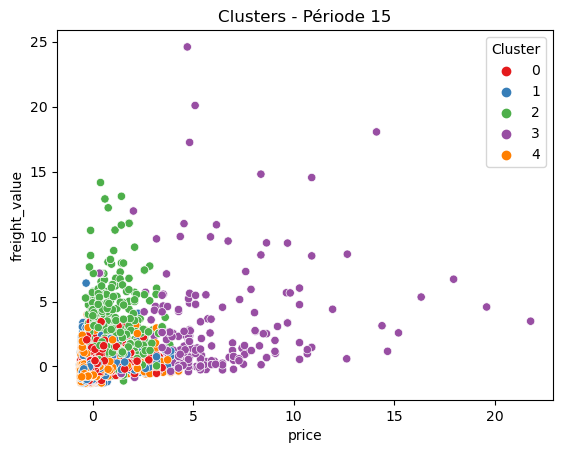

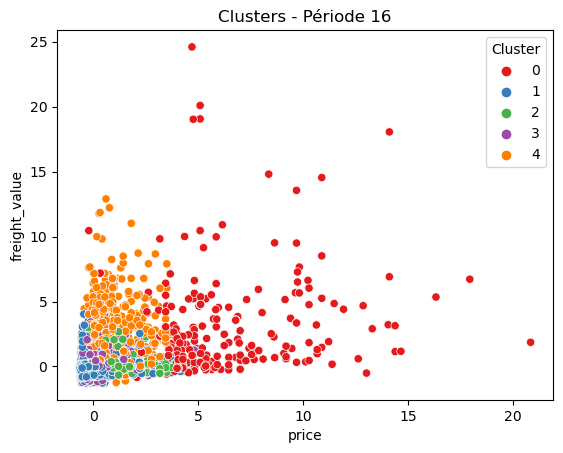

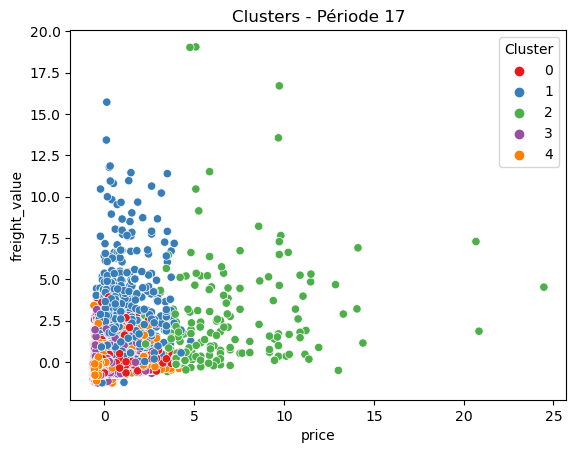

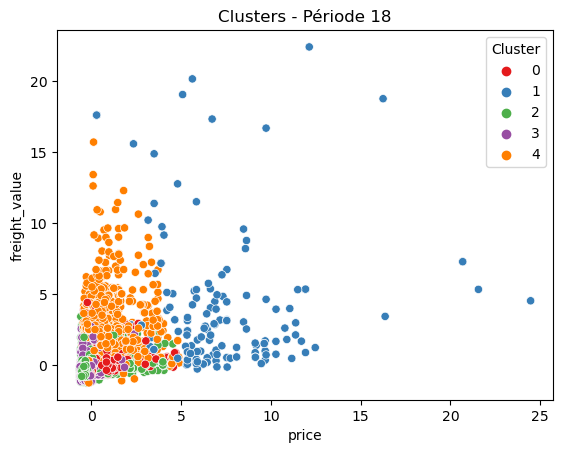

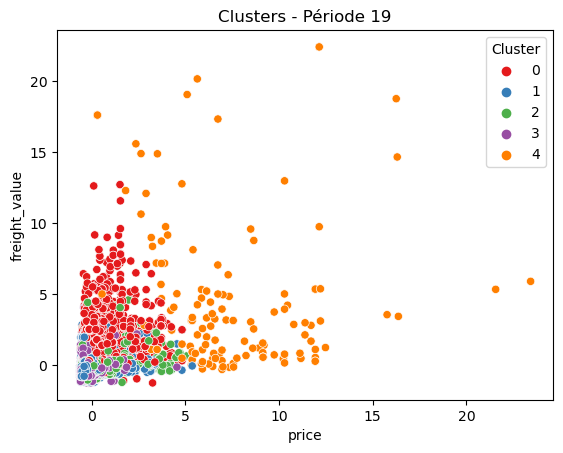

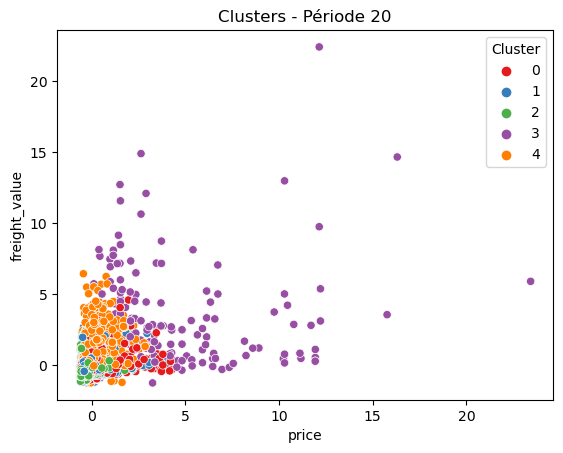

In [11]:
### Dans ce script nous travaillons sur la visualisation des données réparties par périodes
### L'objectif est de créer des graphique représentant la dispersion des clusters

import matplotlib.pyplot as plt
import seaborn as sns

# Boucle à travers les périodes temporelles restantes
for i in range(len(periodes_temporelles_restants)-1):
    # Filtrer les données pour n'inclure que les données de cette période
    periode_data = data[(data['purchase_date'] >= periodes_temporelles_restants_start[i]) & (data['purchase_date'] < periodes_temporelles_restants_end[i+1])]
    
    # Exclure les colonnes non numériques
    periode_data_numeric = periode_data.select_dtypes(include=['float64', 'int64'])  
    
    # Effectuer le clustering sur les données de la période
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    labels = kmeans.fit_predict(periode_data_numeric)
    
    # Visualiser les clusters
    plt.figure()
    sns.scatterplot(data=periode_data_numeric, x='price', y='freight_value', hue=labels, palette='Set1')
    plt.title(f"Clusters - Période {i+1}")
    plt.xlabel('price')
    plt.ylabel('freight_value')
    plt.legend(title='Cluster')
    plt.show()

Comme nous avons pu le constater grâce à ces graphiques, la répartition est beaucoup moins claire lorsque nous utilisons uniquement un sous-ensemble des données (par périodes), avec les mêmes caractéristiques en ordonnée et en abscisse.

In [7]:
### Ici ce script nous permet de faire une répartition des données par périodes mais cette fois ci par trimestre

# Créer une liste de périodes trimestrielles
periodes_temporelles = pd.period_range(start=periode_debut, end=periode_fin, freq='Q')

# Convertir les périodes temporelles en objets datetime64
periodes_temporelles_start = periodes_temporelles.to_timestamp()
periodes_temporelles_end = periodes_temporelles.to_timestamp(how='end')

# Boucle à travers les périodes temporelles
for i in range(len(periodes_temporelles)-1):
    # Filtrer les données pour n'inclure que les données de cette période
    periode_data = data[(data['purchase_date'] >= periodes_temporelles_start[i]) & (data['purchase_date'] < periodes_temporelles_end[i+1])]
    
    print(f"Période {i+1} : de {periodes_temporelles[i]} à {periodes_temporelles[i+1]}")
    print(f"Nombre d'entrées de données dans cette période : {len(periode_data)}")

Période 1 : de 2016Q3 à 2016Q4
Nombre d'entrées de données dans cette période : 381
Période 2 : de 2016Q4 à 2017Q1
Nombre d'entrées de données dans cette période : 6484
Période 3 : de 2017Q1 à 2017Q2
Nombre d'entrées de données dans cette période : 16894
Période 4 : de 2017Q2 à 2017Q3
Nombre d'entrées de données dans cette période : 25658
Période 5 : de 2017Q3 à 2017Q4
Nombre d'entrées de données dans cette période : 35613
Période 6 : de 2017Q4 à 2018Q1
Nombre d'entrées de données dans cette période : 45244
Période 7 : de 2018Q1 à 2018Q2
Nombre d'entrées de données dans cette période : 48082
Période 8 : de 2018Q2 à 2018Q3
Nombre d'entrées de données dans cette période : 38220


In [13]:
### Et maintenant on fait exactement pareil que précédement mais cette fois ci par trimestre


# Définir les périodes pour les premiers quatre mois
periode_debut = '2016-09'
debut_quatrieme_mois = '2017-01'

# Définir le nombre de clusters
nombre_de_clusters = 5

# Création d'une liste pour stocker les DataFrames par période
dataframes_par_trimestre = []

# Sélection des données des quatre premiers mois
periode_data_premiers_mois = data[(data['purchase_date'] >= periode_debut) & (data['purchase_date'] < debut_quatrieme_mois)]

# Ajout des données des quatre premiers mois au premier DataFrame
dataframes_par_trimestre.append(periode_data_premiers_mois)

# Création d'une liste de périodes trimestrielles pour les trimestres restants
trimestres = pd.period_range(start=debut_quatrieme_mois, end=periode_fin, freq='Q')

# Convertion des périodes trimestrielles en objets datetime64
trimestres_start = trimestres.to_timestamp()
trimestres_end = trimestres.to_timestamp(how='end')

# Boucle à travers les trimestres restants
for i in range(len(trimestres)-1):
    # Filtrage des données pour n'inclure que les données de ce trimestre
    trimestre_data = data[(data['purchase_date'] >= trimestres_start[i]) & (data['purchase_date'] < trimestres_end[i+1])]
    
    # Ajout du DataFrame du trimestre à la liste
    dataframes_par_trimestre.append(trimestre_data)

# Boucle à travers les DataFrames par trimestre
for i, trimestre_data in enumerate(dataframes_par_trimestre):
    # Sélection de toutes les colonnes comme caractéristiques
    X = trimestre_data.drop(columns=['purchase_date'])  
    
    # Initialisation et lancement de l'algorithme KMeans
    kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    
    # Calcul du score de silhouette
    score_silhouette = silhouette_score(X, clusters)
    
    # Affichage du score de silhouette pour les différents trimestre 
    print(f"Score de silhouette pour le trimestre {i+1} : {score_silhouette}")

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score de silhouette pour le trimestre 1 : 0.08872476355336327
Score de silhouette pour le trimestre 2 : 0.12234743439570726
Score de silhouette pour le trimestre 3 : 0.13336925541679892
Score de silhouette pour le trimestre 4 : 0.14252766252846338
Score de silhouette pour le trimestre 5 : 0.21643488640899738
Score de silhouette pour le trimestre 6 : 0.11954788051550248
Score de silhouette pour le trimestre 7 : 0.10252855147389829


Pour l'ajout de client il serait donc intéréssant de pouvoir les ajouter peu à peu lors de la mise à jour de la maintenance periodiquement.

De plus selon ces résultats, il semblerait donc que nous pourrions décider de mettre à jour le contrat de maintenance à intervalles réguliers (par exemple, tous les trimestres) ou de manière adaptative, en réagissant aux changements significatifs dans la structure des données. Etant données que pour certaines périodes on observe des changements significatifs.